In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# Mount drive:
mount = '/content/drive'
from google.colab import drive
drive.mount(mount)

Mounted at /content/drive


In [ ]:
!pip install dlib
import dlib
print(dlib.__version__)

19.24.2


In [ ]:
detector_path = '/content/drive/MyDrive/calismalar/computer vision studies/dlib68 face detection/shape_predictor_68_face_landmarks (1).dat'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(detector_path)

# Baseline Learning

In [ ]:
img_opened = '/content/drive/MyDrive/calismalar/computer vision studies/dlib68 face detection/opened.jpg'
img_closed = '/content/drive/MyDrive/calismalar/computer vision studies/dlib68 face detection/closed.jpg'

#open eye image
img_o = cv2.imread(img_opened)
rate = img_o.shape[1]/img_o.shape[0]
a_o = cv2.resize(img_o,(int(rate*400), 400))
gray_o  = cv2.cvtColor(a_o, cv2.COLOR_BGR2GRAY)
faces_o = detector(gray_o)
print('[Opened] The faces found:',len(faces_o))
#close eye image
img_c = cv2.imread(img_closed)
rate = img_c.shape[1]/img_c.shape[0]
a_c = cv2.resize(img_c,(int(rate*400), 400))
gray_c  = cv2.cvtColor(a_c, cv2.COLOR_BGR2GRAY)
faces_c = detector(gray_c)
print('[Closed] The faces found:',len(faces_c))


[Opened] The faces found: 1
[Closed] The faces found: 1


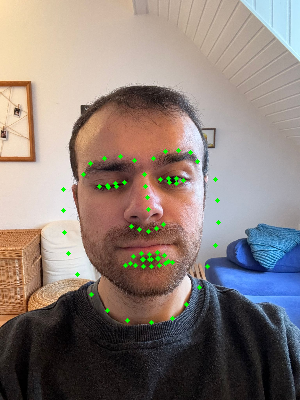

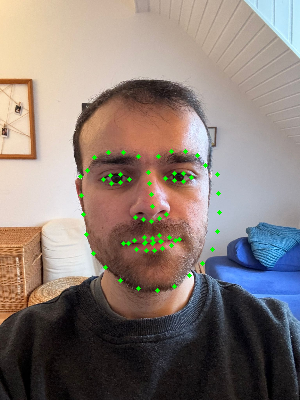

In [ ]:
for points in faces_o:
  new_rectangular = dlib.rectangle(points.left(), points.top(), points.right(), points.bottom())
  shape = predictor(gray_o , new_rectangular)
  for i in range(68):
    x, y = shape.part(i).x, shape.part(i).y
    cv2.circle(a_o, (x, y), 2, (0, 255, 0), -1)


for points in faces_c:
  new_rectangular = dlib.rectangle(points.left(), points.top(), points.right(), points.bottom())
  shape = predictor(gray_c , new_rectangular)
  for i in range(68):
    x, y = shape.part(i).x, shape.part(i).y
    cv2.circle(a_c, (x, y), 2, (0, 255, 0), -1)

cv2_imshow(a_c)
cv2_imshow(a_o)

In [ ]:
#closed eyes
full_coord_c = []
for points in faces_c:
  new_rectangular = dlib.rectangle(points.left(), points.top(), points.right(), points.bottom())
  shape = predictor(gray_c , new_rectangular)

  for i in range(68):
    x, y = shape.part(i).x, shape.part(i).y
    #if i in range(36,43):
    #  left_coord_c.append([x,y])
    full_coord_c.append([shape.part(i).x, shape.part(i).y])

#opened eyes
full_coord_o = []
for points in faces_o:
  new_rectangular = dlib.rectangle(points.left(), points.top(), points.right(), points.bottom())
  shape = predictor(gray_o , new_rectangular)

  for i in range(68):
    x, y = shape.part(i).x, shape.part(i).y
    #if i in range(36,43):
    #  left_coord_c.append([x,y])
    full_coord_o.append([shape.part(i).x, shape.part(i).y])

In [ ]:
print(len(full_coord_o),len(full_coord_c))

68 68


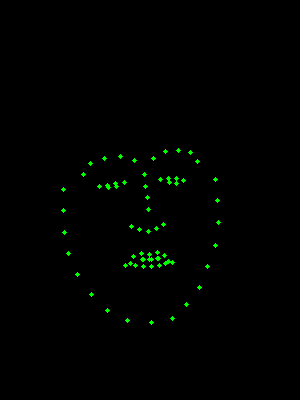

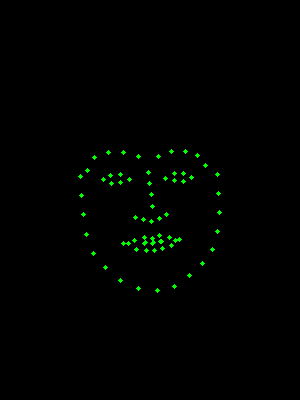

In [ ]:
empty_c = np.zeros_like(a_c)

for ex,ey in full_coord_c:
  cv2.circle(empty_c, (ex, ey), 2, (0, 255, 0), -1)

cv2_imshow(empty_c)


empty_o = np.zeros_like(a_o)

for ex,ey in full_coord_o:
  cv2.circle(empty_o, (ex, ey), 2, (0, 255, 0), -1)

cv2_imshow(empty_o)



* Short edge A = data[38] - data[42]

* Short edge B = data[39] - data[41]

* Long edge C = data[40] - data[37]



---
AREA = (A+B)/2C








In [ ]:
#closed left eye area:
#full_coord_c
from scipy.spatial import distance as dist # for calculating the distance

def calculate_eye_area(coord):

  #right coordination
  a = dist.euclidean(coord[37], coord[41])
  b = dist.euclidean(coord[38], coord[40])
  c = dist.euclidean(coord[39], coord[36])
  area_right = (a+b)/(2*c)

  #left coordination:
  a = dist.euclidean(coord[47], coord[43])
  b = dist.euclidean(coord[46], coord[44])
  c = dist.euclidean(coord[45], coord[42])
  area_left = (a+b)/(2*c)

  return area_right, area_left


In [ ]:
print('Close Eye')
cright_eye,cleft_eye= calculate_eye_area(full_coord_c)
print('Right:{0}, Left:{1}'.format(cright_eye,cleft_eye))


print('Open Eye')
oright_eye,oleft_eye = calculate_eye_area(full_coord_o)
print('Right:{0}, Left:{1}'.format(oright_eye,oleft_eye))



Close Eye
Right:0.10661091655527694, Left:0.19814119257819596
Open Eye
Right:0.30888957208266443, Left:0.2882484157590329


In [ ]:
print('Short Edges- CLOSED')
print(dist.euclidean(full_coord_c[41], full_coord_c[37]))
print(dist.euclidean(full_coord_c[40], full_coord_c[38]))

Short Edges- CLOSED
2.23606797749979
3.1622776601683795


In [ ]:
print('Short Edges- OPENED')
print(dist.euclidean(full_coord_c[47], full_coord_c[43]))
print(dist.euclidean(full_coord_c[46], full_coord_c[44]))

Short Edges- OPENED
4.123105625617661
5.0


# Video Deneme

In [ ]:
def eye_contour_calculate(coord,shape):
  y = shape[0]
  x = shape[1]
  #right eye:
  right_eye_arr = []
  left_eye_arr = []
  area = ()

  #control:
  empty_image = np.zeros((y, x,3), dtype=np.uint8)

  for point in range(68):

    if point in range(36,42): # for right eye
      right_eye_arr.append(coord[point])
    if point in range(42,48): # for left eye
      left_eye_arr.append(coord[point])
  print(right_eye_arr)
  print(left_eye_arr)

  #needed to reshape because of parsing error
  left_closure = np.array(left_eye_arr, dtype=np.int32).reshape((-1, 1, 2))
  right_closure = np.array(right_eye_arr, dtype=np.int32).reshape((-1, 1, 2))

  img_d = empty_image.copy()
  a=cv2.polylines(img_d,[right_closure], isClosed=True, color=(0, 255, 0), thickness=2)


  b=cv2.polylines(a,[left_closure], isClosed=True, color=(0, 0, 255), thickness=2)

  #AREA CALCULATION.
  area = (cv2.contourArea(right_closure),cv2.contourArea(left_closure))

  positionright = tuple(coord[37])
  positionright = (positionright[0] - 10, positionright[1] - 10)
  txtright = 'Right:{}'.format(area[0])


  positionleft = tuple(coord[43])
  positionleft = (positionleft[0]+10, positionleft[1] +30)
  txtleft = 'Left:{}'.format(area[1])

  cv2.putText(b,txtright,positionright,cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),1)
  cv2.putText(b,txtleft,positionleft,cv2.FONT_HERSHEY_SIMPLEX,0.5,(0, 0, 255),1)

  cv2_imshow(b)


  print(area)



In [ ]:
video_path = '/content/drive/MyDrive/calismalar/computer vision studies/dlib68 face detection/son.mp4'
frames = 0
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fw = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fh = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fsize = (fw,fh)
print(frames)
print(fps)


727.0
29.971141954101967


In [ ]:
org_img = []
processed_img = []
r_area = []
l_area = []
c_l_area = []
c_r_area = []

if not cap.isOpened():
  print('Video cannot be opened')
else:
  while cap.isOpened():
    ret, frame = cap.read()
    if not ret == True:
      print('video is over')
      break
    else:

      org_imaj = frame
      black_gnd_frame = np.zeros_like(org_imaj)
      gray = cv2.cvtColor(org_imaj, cv2.COLOR_BGR2GRAY)
      org_img.append(frame)
      faces = detector(gray)
      print('The faces found:',len(faces))

      for points in faces:
        full_coord = []

        new_rectangular = dlib.rectangle(points.left(), points.top(), points.right(), points.bottom())
        shape = predictor(gray , new_rectangular)
        for i in range(68):
          x, y = shape.part(i).x, shape.part(i).y
          full_coord.append([shape.part(i).x, shape.part(i).y])
          cv2.circle(black_gnd_frame, (x, y), 2, (0, 255, 0), -1)
        a,b=calculate_eye_area(full_coord)
        #a_contour, b_contour = eye_contour_calculate(full_coord)
        r_area.append(a)
        l_area.append(b)
        #c_r_area.append(a_contour)
        #c_l_area.append(b_contour)

        processed_img.append(black_gnd_frame)



The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces fo

In [ ]:
org_img[0].shape

(848, 480, 3)

In [ ]:
a.shape[0]

212

212 120


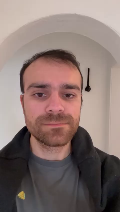

In [ ]:
rate = org_img[0].shape[0]/org_img[0].shape[1]
y = 120
x = int(y*rate)
print(x,y)
a = cv2.resize(org_img[0],(y,x))
cv2_imshow(a)

In [ ]:
print(org_img[0].shape)

rate = org_img[0].shape[0]/org_img[0].shape[1]
y = 360
x = int(y*rate)
a = cv2.resize(org_img[0],(y,x))

gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
faces = detector(gray)
coord = []
print('The faces found:',len(faces))
new_rectangular = dlib.rectangle(faces[0].left(), faces[0].top(), faces[0].right(), faces[0].bottom())
shape = predictor(gray , new_rectangular)
for i in range(68):
  x, y = shape.part(i).x, shape.part(i).y
  coord.append([shape.part(i).x, shape.part(i).y])

(848, 480, 3)
The faces found: 1


In [ ]:
len(coord)

68

[[103, 286], [114, 279], [127, 280], [139, 288], [127, 290], [114, 290]]
[[186, 289], [198, 281], [210, 283], [221, 289], [211, 293], [198, 292]]


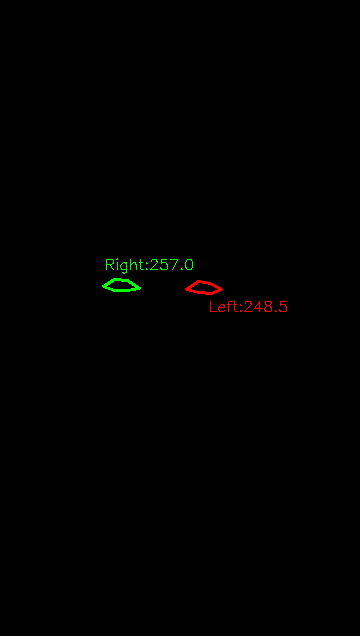

(257.0, 248.5)


In [ ]:
eye_contour_calculate(coord,a.shape)

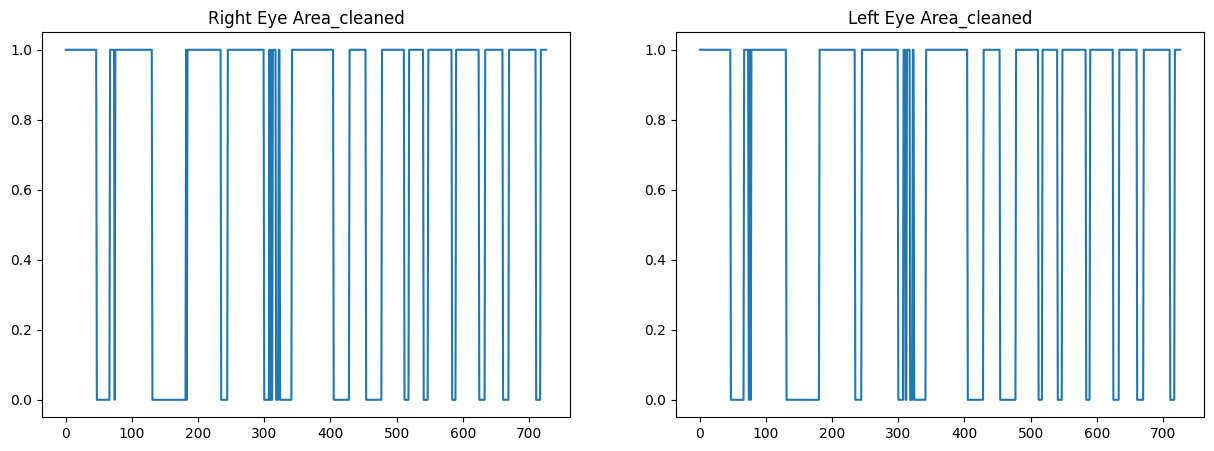

In [ ]:
clear_data_right = []
for each in r_area:
  if each> 0.27:
    clear_data_right.append(1)
  else:
    clear_data_right.append(0)

clear_data_left = []
for each in l_area:
  if each< 0.27:
    clear_data_left.append(0)
  else:
    clear_data_left.append(1)


x_range = np.arange(0,len(clear_data_right))

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x_range,clear_data_right)
ax[0].set_title('Right Eye Area_cleaned')
ax[1].plot(x_range,clear_data_left)
ax[1].set_title('Left Eye Area_cleaned')
plt.show()

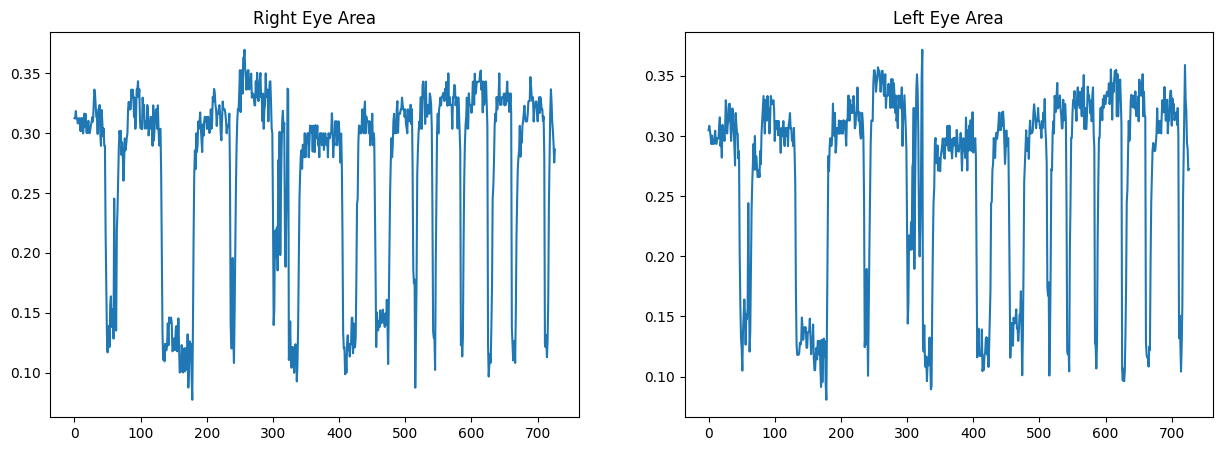

In [ ]:
y1 = np.array(r_area)
y2 = np.array(l_area)
x_range = np.arange(0,len(y1))

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x_range,y1)
ax[0].set_title('Right Eye Area')
ax[1].plot(x_range,y2)
ax[1].set_title('Left Eye Area')
plt.show()

In [ ]:
#writing the frames into video
outpath = '/content/drive/MyDrive/calismalar/computer vision studies/dlib68 face detection/x.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(outpath, fourcc, fps, fsize)

for each_frame in processed_img:
  video_writer.write(each_frame)

video_writer.release()



# Integration

In [49]:
#libraries:

import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
import matplotlib.pyplot as plt
import dlib
print(dlib.__version__)
from scipy.spatial import distance as dist

# Mount drive:
mount = '/content/drive'
from google.colab import drive
drive.mount(mount)

#dlib68 integration
dlib_path = '/content/drive/MyDrive/calismalar/computer vision studies/dlib68 face detection/shape_predictor_68_face_landmarks (1).dat'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(dlib_path)

19.24.2
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
def eye_contour_calculate(image,coord,shape):
  #control:
  #x = shape[0]
  #y = shape[1]
  #empty_image = np.zeros((x, y,3), dtype=np.uint8)

  right_eye_arr = []
  left_eye_arr = []
  area = ()

  empty_image = image.copy()

  for point in range(68):

    if point in range(36,42): # for right eye
      right_eye_arr.append(coord[point])
    if point in range(42,48): # for left eye
      left_eye_arr.append(coord[point])
  #print(right_eye_arr)
  #print(left_eye_arr)

  #needed to reshape because of parsing error
  left_closure = np.array(left_eye_arr, dtype=np.int32).reshape((-1, 1, 2))
  right_closure = np.array(right_eye_arr, dtype=np.int32).reshape((-1, 1, 2))

  img_d = empty_image.copy()


  a=cv2.polylines(img_d,[right_closure], isClosed=True, color=(0, 255, 0), thickness=2) #Right eye: Green
  b=cv2.polylines(a,[left_closure], isClosed=True, color=(0, 0, 255), thickness=2) #Left eye: Blue

  #AREA CALCULATION
  right = cv2.contourArea(right_closure)
  left = cv2.contourArea(left_closure)
  print(right,left) #just so to control

  positionright = tuple(coord[37])
  positionright = (positionright[0] - 10, positionright[1] - 10)
  txtright = 'Right:{}'.format(right)


  positionleft = tuple(coord[43])
  positionleft = (positionleft[0]+10, positionleft[1] +30)
  txtleft = 'Left:{}'.format(left)

  cv2.putText(b,txtright,positionright,cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),1)
  cv2.putText(b,txtleft,positionleft,cv2.FONT_HERSHEY_SIMPLEX,0.5,(0, 0, 255),1)

  #cv2_imshow(b)

  return b, right ,left # (first: right closure, second: left closure)

In [111]:
video_path = '/content/drive/MyDrive/calismalar/computer vision studies/dlib68 face detection/far.mp4'

cap = cv2.VideoCapture(video_path)
frame = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
f_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
f_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
f_size = (f_width,f_height)
print('Frame:',frame)
print('FPS:',fps)
print('Size:',f_size)
rate = f_height/f_width
print(rate)


Frame: 303.0
FPS: 30.0
Size: (480.0, 848.0)
1.7666666666666666


In [112]:
video_path = '/content/drive/MyDrive/calismalar/computer vision studies/dlib68 face detection/far.mp4'
cap = cv2.VideoCapture(video_path)

face_area = []
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

if not cap.isOpened():
  print('Video cannot be opened')
else:
  while cap.isOpened():
    ret, frame = cap.read()
    if not ret == True:
      print('video is over')
      break
    else:
      fimage = frame.copy()
      gray = cv2.cvtColor(fimage, cv2.COLOR_BGR2GRAY)
      faces = face_cascade.detectMultiScale(gray, 1.3, 5)
      print('The faces found:',len(faces))
      for each in faces:
        x,y,w,h = each
        area = w*h
        face_area.append(area)
print(int(np.mean(face_area)))

The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces found: 1
The faces fo

In [82]:
average_face_area

52804

In [116]:
video_path = '/content/drive/MyDrive/calismalar/computer vision studies/dlib68 face detection/far.mp4'
cap = cv2.VideoCapture(video_path)

org_img = []          #Saves the frame as original
processed_img = []    #Saves the frame processed
left_area = []        #Saves the area of left closure
right_area = []       #Saves the area of right closure
right_rate_list = []  #Saves the rate of face and eye in right
left_rate_list = []   #Saves the rate of face and eye in left
blink = 0             #number of blinking
blank_logic = []      #Saves the logic of each blinking
is_closed = False     #track the eye is closed


average_face_area = int(np.mean(face_area))
coef = 600
threshold = int(average_face_area / coef)
print('Open Close Threshold',threshold)

eye_to_face_ratio = threshold/average_face_area #if lower, then it is closed
print('average face area is', average_face_area)
print('eye to face ratio is', eye_to_face_ratio)


if not cap.isOpened():
  print('Video cannot be opened, {Error Type1}')
else:
  while cap.isOpened():
    ret,frame = cap.read() # keep reading the frames from the video
    if not ret == True:
      print('Video is played succesfully, {Error Type2}')
      break
    else:

      f_img = frame.copy()
      org_img.append(f_img) #saving the original images as backup for any comparison

      #Reshaping the image so that we can show only the eye blinking in black background
      a = cv2.resize(f_img,(360,int(360*rate)))

      gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

      faces = detector(gray)
      print('The number of face, detected : ',len(faces))

      if len(faces) == 0: #no face detected
        print('No face detected')
        processed_img.append(a)
      else:               #the face detected
        #go deeper into faces detected by dlib68
        for points in faces:
          face_coord = []       #68 dots in the face will be saved here. (it will be iterated by each face detected in next frame)

          new_rectangular = dlib.rectangle(points.left(), points.top(), points.right(), points.bottom())
          shape = predictor(gray , new_rectangular)

          for i in range(68): # filling out the arr with 68 dots
            x, y = shape.part(i).x, shape.part(i).y
            face_coord.append([shape.part(i).x, shape.part(i).y])

          imaj,r,l=eye_contour_calculate(a,face_coord,a.shape)

          print(r,l,threshold)
          if r < threshold and l < threshold:  # Eyes are closed
            current_status = False
            if current_status == False and previous_status == True:
              blink +=1
              previous_status = current_status
          else:
            current_status = True
            previous_status = current_status
          print('-------------------------------->>>>>>> ',blink)

          right_area.append(r)
          left_area.append(l)
          txt = 'Blink:{0}'.format(blink)
          cv2.putText(imaj,txt,(40,40),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,0),2)
          processed_img.append(imaj)


print('The frame number of video', cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('Original frame:', len(org_img))
print('Processed frame:', len(processed_img))
print('Area of eyes detected: R{0}/L{1}'.format(len(right_area),len(left_area)))

Open Close Threshold 88
average face area is 52804
eye to face ratio is 0.00166654041360503
The number of face, detected :  1
112.5 105.5
112.5 105.5 88
-------------------------------->>>>>>>  0
The number of face, detected :  1
110.5 105.5
110.5 105.5 88
-------------------------------->>>>>>>  0
The number of face, detected :  1
110.5 105.5
110.5 105.5 88
-------------------------------->>>>>>>  0
The number of face, detected :  1
110.5 98.0
110.5 98.0 88
-------------------------------->>>>>>>  0
The number of face, detected :  1
110.0 107.0
110.0 107.0 88
-------------------------------->>>>>>>  0
The number of face, detected :  1
111.5 109.0
111.5 109.0 88
-------------------------------->>>>>>>  0
The number of face, detected :  1
111.5 107.5
111.5 107.5 88
-------------------------------->>>>>>>  0
The number of face, detected :  1
119.0 119.0
119.0 119.0 88
-------------------------------->>>>>>>  0
The number of face, detected :  1
128.5 128.0
128.5 128.0 88
-----------------

In [ ]:
gray.shape

(636, 360)

In [115]:
#writing the frames into video
outpath = '/content/drive/MyDrive/calismalar/computer vision studies/dlib68 face detection/deneme_far_tune.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(outpath, fourcc, int(fps), (gray.shape[1],gray.shape[0]))

for each_frame in processed_img:
  video_writer.write(each_frame)

video_writer.release()


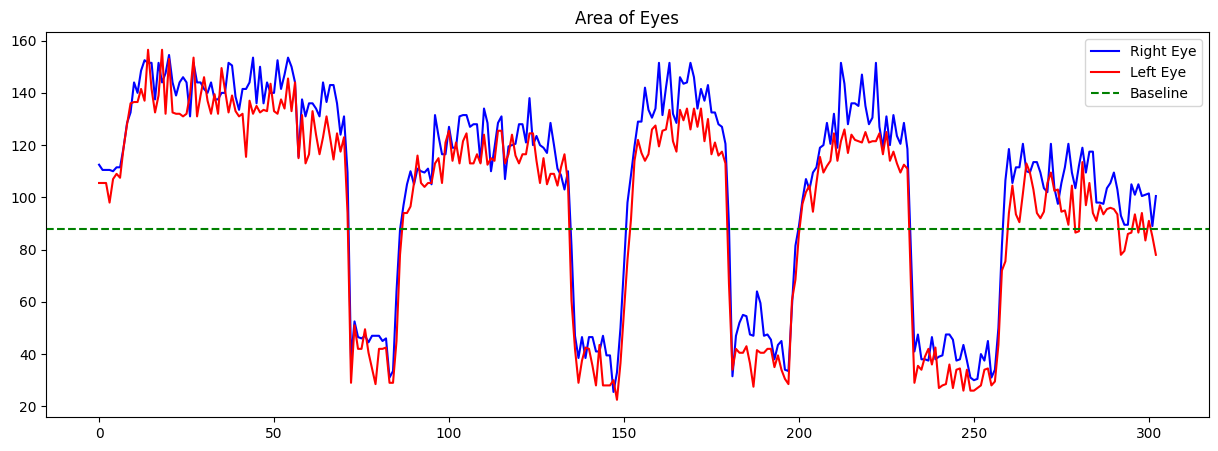

In [117]:
#area_eyes ---->  (first: right closure, second: left closure)
#------------------------------ EN UZAKTAN ------------------------------

x_line = np.arange(0,len(right_area))

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(x_line,right_area,color = 'blue',label = 'Right Eye')
ax.plot(x_line,left_area,color = 'red', label = 'Left Eye')
plt.axhline(y=threshold, color='green', linestyle='--', label='Baseline')
ax.set_title('Area of Eyes')
plt.legend()

# Show the plot
plt.show()


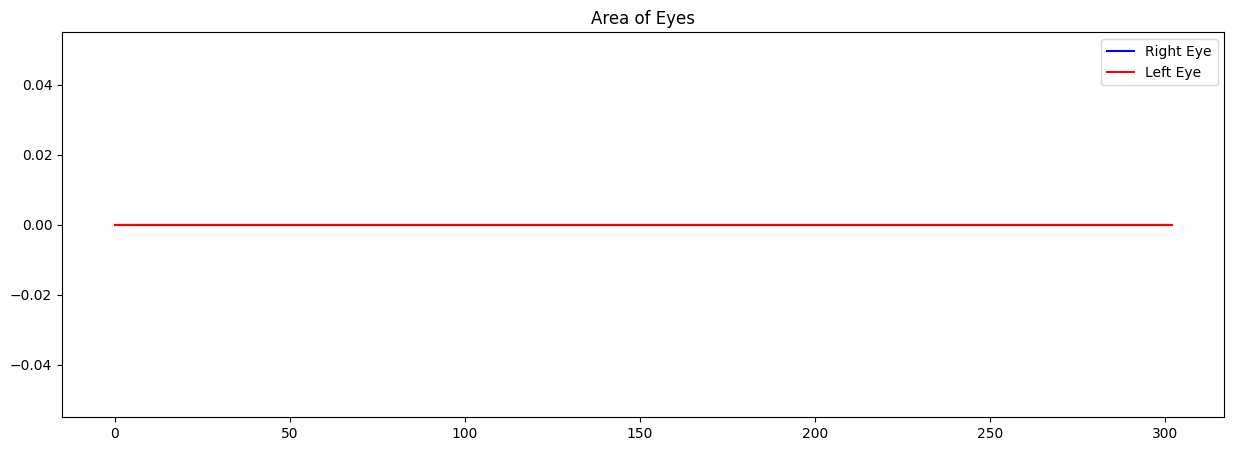

In [118]:
close_eye_timer = []
threshold = 200
r_fixed = []
for e1 in right_area:
  if e1 > threshold:
    r_fixed.append(1) #eyes open
  else:
    r_fixed.append(0) #eyes closed

l_fixed = []
for e1 in left_area:
  if e1 > threshold:
    l_fixed.append(1) #eyes open
  else:
    l_fixed.append(0) #eyes closed

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(x_line,r_fixed,color = 'blue',label = 'Right Eye')
ax.plot(x_line,l_fixed,color = 'red', label = 'Left Eye')
ax.set_title('Area of Eyes')
plt.legend()

# Show the plot
plt.show()

In [ ]:
print(len(r_fixed))
print(len(l_fixed))

727
727


In [ ]:
def close_eye_sequence(mydata):

  # Initialize variables
  zeros_sequence = []
  counter = 0

  for value in l_fixed:
    if value == 0:
        # Increment the counter
        counter += 1
    else:
        # If a 1 is encountered and time to save it
        if counter > 0:
            zeros_sequence.append(counter)
            counter = 0  # Reset the count
  return zeros_sequence


In [ ]:
a=close_eye_sequence(l_fixed)
len(a)

13